In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Data/2Vehicle_PoC_results.xlsx',index_col=[0])

In [ ]:
data.head()

,Vehicle Number,Date And Time,Location,Ignition Status,newDT,Date,Time,distance in mts,FLAG,STime (s),TTime (s),Stop Time,Transit Time,Dtransit (mts),GPS_error,Primary Place,Primary Type,Primary Coord,Primary dist (mts),Rough Address,Place1,type1,coord1,Distance1,Place2,type2,coord2,Distance2,Place3,type3,coord3,Distance3,Primary ID
Sno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,TN 07 CU 8709,"2nd Jan 2021, 5:40:28 AM","12.963027,80.138908",OFF,2021-01-02 05:40:28,2,05 : 40 : 28,0.000000,STOP,313.000000,993.000000,0:05:13,0:16:33,8012.243141,1.386657,Bigbasket Nagalkeni,HUB,"(12.9634573, 80.1384886)",65.854985,"11, MGR Rd, Abdul Kalam Nagar, Shiva Shankar N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bigbasket Nagalkeni
1,TN 07 CU 8709,"2nd Jan 2021, 5:46:21 AM","12.962717,80.139206",OFF,2021-01-02 05:46:21,2,05 : 46 : 21,0.929294,STOP,132.999999,40.000000,0:02:12.999999,0:00:40,56.818467,3.113020,Bigbasket Nagalkeni,WEAK HUB,"(12.9634573, 80.1384886)",112.988297,"11, MGR Rd, Abdul Kalam Nagar, Shiva Shankar N...",rad enterprises,"clothing_store, point_of_interest, store, esta...","12.9628321,80.1391441",14.396190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bigbasket Nagalkeni
2,TN 07 CU 8709,"2nd Jan 2021, 5:49:12 AM","12.962678,80.139221",OFF,2021-01-02 05:49:12,2,05 : 49 : 12,4.314577,STOP,7069.999999,38.000001,1:57:49.999999,0:00:38.000001,14.582652,4.061796,Bigbasket Nagalkeni,WEAK HUB,"(12.9634573, 80.1384886)",117.250629,"11, MGR Rd, Abdul Kalam Nagar, Shiva Shankar N...",rad enterprises,"clothing_store, point_of_interest, store, esta...","12.9628321,80.1391441",18.980403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bigbasket Nagalkeni
3,TN 07 CU 8709,"2nd Jan 2021, 7:49:41 AM","12.963018,80.138901",OFF,2021-01-02 07:49:41,2,07 : 49 : 41,1.406179,STOP,8.999999,159.000001,0:00:08.999999,0:02:39.000001,107.390549,1.653544,Bigbasket Nagalkeni,HUB,"(12.9634573, 80.1384886)",66.061492,"11, MGR Rd, Abdul Kalam Nagar, Shiva Shankar N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bigbasket Nagalkeni
4,TN 07 CU 8709,"2nd Jan 2021, 8:20:22 AM","12.921137,80.130157",OFF,2021-01-02 08:20:22,2,08 : 20 : 22,0.868151,STOP,206.000000,1832.000001,0:03:26,0:30:32.000001,7137.114475,1.383129,NaN,WEAK WORK BREAK,NaN,NaN,"No.4, Kaveri street, Leela Nagar Main Rd, Leel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
req=pd.DataFrame()
cols=["Location","Date",	"Time",	"distance in mts",	"STime (s)",	"TTime (s)",	"Dtransit (mts)"]
req[cols]=data[cols]

# TIME CATEGORISATION

In [ ]:
# import datetime
# import time
# import numpy as np

# def timehc(t):
#   t=datetime.datetime.strptime( t , '%H : %M : %S').time()
  
#   for x in range(24):
#     # print(x)
#     # print(datetime.time(x,0,0))
#     if (t>=datetime.time(x,0,0) and t<datetime.time(x,30,0)):
#       return float(x+0.1)
#     if (x<=22):
#       if (t>=datetime.time(x,30,0) and t<datetime.time(x+1,0,0)):
#         return float(x+0.2)
#     elif (x==23):
#       if (t>=datetime.time(23,30,0) and t<datetime.time(23,59,59)):
#         return float(x+0.2)


In [ ]:

import datetime
import time
import numpy as np

def timehc(t):
  t=datetime.datetime.strptime( t , '%H : %M : %S').time()
  count=1
  for x in range(6,21,2):
    # print(x)
    # print(datetime.time(x,0,0))
    if (t>=datetime.time(x,0,0) and t<datetime.time(x+1,59,59)):
      return int(count)
    count=count+1
  return int(9)

In [ ]:
req['Time_cat']=np.nan
for i in range(req.shape[0]):
  # print(req.loc[i,'Time_cat'],timehc(req.loc[i,'Time']))
  if float(req.loc[i,"STime (s)"]) > 21600:
    print(req.loc[i,'Time'],0,"Night Halt")
    req.loc[i,'Time_cat']=int(0)
  else:
    print(req.loc[i,'Time'],timehc(req.loc[i,'Time']))
    req.loc[i,'Time_cat']=timehc(req.loc[i,'Time'])

05 : 40 : 28 9
05 : 46 : 21 9
05 : 49 : 12 9
07 : 49 : 41 1
08 : 20 : 22 2
08 : 36 : 43 2
08 : 41 : 59 2
09 : 27 : 42 2
09 : 34 : 14 2
13 : 16 : 47 4
14 : 08 : 07 5
14 : 13 : 53 5
15 : 50 : 49 5
16 : 07 : 35 6
16 : 50 : 14 6
17 : 05 : 01 6
19 : 08 : 38 7
19 : 34 : 10 7
19 : 47 : 41 7
19 : 59 : 02 7
20 : 06 : 27 8
20 : 18 : 46 0 Night Halt
05 : 45 : 01 9
05 : 47 : 10 9
07 : 06 : 17 1
08 : 13 : 01 2
08 : 15 : 34 2
08 : 42 : 21 2
08 : 53 : 03 2
10 : 04 : 27 3
10 : 24 : 38 3
10 : 51 : 18 3
11 : 42 : 37 3
11 : 47 : 43 3
13 : 17 : 50 4
14 : 47 : 35 5
16 : 16 : 45 6
16 : 46 : 44 6
17 : 11 : 13 6
17 : 15 : 18 6
18 : 17 : 29 7
18 : 21 : 01 7
18 : 30 : 49 7
18 : 41 : 08 7
18 : 43 : 33 7
18 : 49 : 33 7
19 : 30 : 35 7
19 : 40 : 26 7
20 : 40 : 53 8
20 : 43 : 58 8
21 : 05 : 42 8
21 : 18 : 53 0 Night Halt
05 : 51 : 48 9
06 : 03 : 00 1
06 : 48 : 55 1
08 : 24 : 46 2
09 : 43 : 25 2
10 : 26 : 16 3
10 : 27 : 53 3
14 : 26 : 59 5
14 : 56 : 56 5
14 : 59 : 36 5
15 : 00 : 59 5
17 : 13 : 41 6
17 : 26 : 21 6
17 

In [ ]:
# req['Time_cat']=np.nan
# for i in range(req.shape[0]):
#   print(req.loc[i,'Time'],timehc(req.loc[i,'Time']))
#   req.loc[i,'Time_cat']=timehc(req.loc[i,'Time'])

In [ ]:
req['Time_cat'].value_counts()
# 0 - Night Halt
# 1 - 6-8
# 2 - 8-10
# 3 - 10-12
# 4 - 12-2
# 5 - 2-4
# 6 - 4-6
# 7 - 6-8
# 8 - 8-10
# 9 - between 10 pm and 5 am 

2.0    193
3.0    142
7.0    142
4.0    134
6.0    120
5.0    106
1.0     81
8.0     70
0.0     49
9.0     31
Name: Time_cat, dtype: int64

In [ ]:
req.head()

,Location,Date,Time,distance in mts,STime (s),TTime (s),Dtransit (mts),Time_cat
Sno,,,,,,,,
0,"12.963027,80.138908",2,05 : 40 : 28,0.000000,313.000000,993.000000,8012.243141,9.0
1,"12.962717,80.139206",2,05 : 46 : 21,0.929294,132.999999,40.000000,56.818467,9.0
2,"12.962678,80.139221",2,05 : 49 : 12,4.314577,7069.999999,38.000001,14.582652,9.0
3,"12.963018,80.138901",2,07 : 49 : 41,1.406179,8.999999,159.000001,107.390549,1.0
4,"12.921137,80.130157",2,08 : 20 : 22,0.868151,206.000000,1832.000001,7137.114475,2.0


# HUB AND RESIDENT CATEGORISATION

In [ ]:
res=pd.read_excel("/content/drive/MyDrive/Data/Chennai Manpower and hub location.xlsx",sheet_name="Rider Address")
head=pd.read_excel("/content/drive/MyDrive/Data/Hub location.xlsx",sheet_name="Hub Location")
bb_hub=head[head['Client'].str.contains('bigbasket',case=False) ]
bb_hub=bb_hub.reset_index(drop=True)

In [ ]:
bb_hub

,Unnamed: 0,Client,City,Hub,Address,Pin,Lat,Lon,Status
0,0,Bigbasket Chennai,Chennai,Bigbasket Nagalkeni,"1, MGR Rd, Shiv Shankar Nagar Nagalkeni, Chrom...",600044.0,12.963457,80.138489,Active
1,1,Bigbasket Chennai,Chennai,Bigbasket Vanagaram,"Noombal Main Rd, Shivaji Nagar Poonamallee Che...",600095.0,13.059466,80.144145,Active
2,2,Bigbasket Chennai,Chennai,Bigbasket Mylapore,Mylapore Mylapore,600004.0,13.046299,80.274607,Active
3,3,Bigbasket Chennai,Chennai,BigBasket Kazhipattur,"No 43, Old Kazhipattur link road Padur village...",603103.0,12.812393,80.232862,Active
4,21,Bigbasket Chennai,Chennai,Bigbasket Perungudi,"Velachery Main Rd IIT Colony, Narayanapuram Pa...",600117.0,12.939348,80.205588,Active
5,26,Bigbasket Chennai,Chennai,Bigbasket Korattur,"Mugambigai Nagar ,Korattur, Chennai, Tamil Nad...",600053.0,13.133333,80.185167,Active


In [ ]:
import geopy.distance
import numpy as np
def dist(loc1,loc2):
    coords_1 = loc1
    coords_2 = loc2
    distance = geopy.distance.geodesic(coords_1, coords_2).km *1000
    return distance

In [ ]:
def ctype(location):
    if type(location) is str:
        locc= location.split(',')
        lat=locc[0][1:]
        long=locc[1][:-1]
        home=(float(lat),float(long))
#         print(home)
    elif location is not np.nan:
        home=location
#         print(home)
#     print(hub)
    else:
        home=(0,0)
    return home

def hubres(bb_hub,res,location):
    
    Flag=0

    index=bb_hub.index[0]
    hub= (float(bb_hub.loc[index,'Lat']),float(bb_hub.loc[index,'Lon'])) 
    d=dist((location), hub)
    for i in bb_hub.index[1:]:
        thub=(float(bb_hub.loc[i,'Lat']),float(bb_hub.loc[i,'Lat'])) 
        temp=dist((location), thub)
        if temp<d:
            d=temp
    if d<500:
        Flag=1
    
    index=res.index[0]
    home=ctype(res.loc[index,'Location'])
    d1=dist((location), home)
    for i in res.index[1:]:
        thome=ctype(res.loc[i,'Location'])
        temp1=dist((location), thome)
        if(temp1<d1):
            d1=temp1

    if (Flag==1):
      if (d1<d):
        return 99
      else:
        return 100
    else:
      if (d1<500):
        return 99
      else:
        return 0
    

In [ ]:
req['Place_cat']=np.nan
for i in range(req.shape[0]):
  if req.loc[i,'Time_cat']==0:
    print("Halt")
    req.loc[i,'Place_cat']= 0
  else:
    req.loc[i,'Place_cat']=hubres(bb_hub,res,req.loc[i,'Location'])
    if req.loc[i,'Place_cat']== 100:
      print(i)
  # if req.loc[i,'Place_cat']!= np.nan:
  #   print(req.loc[i,:])
  # if float(req.loc[i,"STime (s)"]) > 21600:
  #   print(req.loc[i,'Time'],0,"Night Halt")
  #   req.loc[i,'Time_cat']=int(0)

0
1
2
3
7
8
10
11
14
15
18
19
Halt
22
23
24
27
28
29
32
33
35
37
Halt
52
53
54
55
57
58
60
61
62
64
65
66
67
Halt
83
84
85
88
89
90
93
94
95
Halt
97
98
99
101
102
103
104
105
106
107
108
111
Halt
117
118
119
125
126
127
128
139
Halt
141
142
143
154
155
156
157
162
163
164
Halt
169
170
171
174
175
176
Halt
184
185
Halt
187
188
189
190
196
197
198
199
200
202
209
Halt
211
212
213
216
217
221
222
223
Halt
225
226
230
231
232
233
234
243
244
245
249
250
255
Halt
257
258
263
264
266
Halt
268
269
278
280
281
287
289
290
297
301
Halt
308
309
316
317
318
319
324
325
326
332
335
336
341
342
343
Halt
349
350
351
363
364
365
375
376
377
378
387
388
Halt
394
395
396
397
398
405
412
413
420
422
423
424
431
432
433
Halt
435
444
445
458
Halt
466
472
473
478
Halt
484
500
501
542
Halt
544
545
553
554
Halt
558
560
561
566
567
573
574
579
580
Halt
583
584
587
588
592
593
Halt
Halt
600
Halt
603
Halt
605
606
607
608
612
613
617
618
Halt
626
632
633
634
640
641
642
647
Halt
Halt
Halt
Halt
Halt
Halt
Halt
Hal

In [ ]:
req['Place_cat'].value_counts()

100.0    269
99.0     112
1.0       91
2.0       75
3.0       60
4.0       48
5.0       39
6.0       34
7.0       25
8.0       22
9.0       17
10.0      17
11.0      16
12.0      16
13.0      15
14.0      13
18.0      11
15.0      11
16.0      11
17.0      11
19.0      10
22.0       9
21.0       9
20.0       9
23.0       8
24.0       7
25.0       7
33.0       6
30.0       6
36.0       6
35.0       6
34.0       6
31.0       6
32.0       6
29.0       6
28.0       6
27.0       6
26.0       6
37.0       5
38.0       5
39.0       4
40.0       4
42.0       3
41.0       3
43.0       2
44.0       2
46.0       1
45.0       1
Name: Place_cat, dtype: int64

In [ ]:
for i in range(req.shape[0]):
  if (req.loc[i,'Place_cat']==100):
    print(i, "HUB")
    count = 1
    j=i+1
    while (j<req.shape[0] and req.loc[j,'Place_cat']!=100):
      if (req.loc[j,'Place_cat'] == 0):
        req.loc[j,'Place_cat']=count
        print(j, count)
        count=count+1
      elif (req.loc[j,'Place_cat']==99):
        print(j,"DR Residence")
      j=j+1

0 HUB
1 HUB
2 HUB
3 HUB
4 DR Residence
5 1
6 2
7 HUB
8 HUB
9 1
10 HUB
11 HUB
12 1
13 2
14 HUB
15 HUB
16 1
17 2
18 HUB
19 HUB
20 1
21 HUB
22 HUB
23 HUB
24 HUB
25 1
26 2
27 HUB
28 HUB
29 HUB
30 1
31 2
32 HUB
33 HUB
34 1
35 HUB
36 1
37 HUB
38 1
39 2
40 3
41 4
42 5
43 6
44 7
45 8
46 9
47 10
48 11
49 12
50 13
51 HUB
52 HUB
53 HUB
54 HUB
55 HUB
56 DR Residence
57 HUB
58 HUB
59 1
60 HUB
61 HUB
62 HUB
63 1
64 HUB
65 HUB
66 HUB
67 HUB
68 1
69 2
70 3
71 4
72 5
73 6
74 7
75 8
76 9
77 10
78 11
79 12
80 13
81 14
82 HUB
83 HUB
84 HUB
85 HUB
86 1
87 2
88 HUB
89 HUB
90 HUB
91 1
92 2
93 HUB
94 HUB
95 HUB
96 HUB
97 HUB
98 HUB
99 HUB
100 1
101 HUB
102 HUB
103 HUB
104 HUB
105 HUB
106 HUB
107 HUB
108 HUB
109 DR Residence
110 DR Residence
111 HUB
112 DR Residence
113 DR Residence
114 DR Residence
115 DR Residence
116 HUB
117 HUB
118 HUB
119 HUB
120 1
121 2
122 3
123 4
124 5
125 HUB
126 HUB
127 HUB
128 HUB
129 DR Residence
130 1
131 2
132 3
133 4
134 5
135 6
136 7
137 8
138 DR Residence
139 HUB
140 HUB
141 H

In [ ]:
req.head()

,Location,Date,Time,distance in mts,STime (s),TTime (s),Dtransit (mts),Time_cat,Place_cat
Sno,,,,,,,,,
0,"12.963027,80.138908",2,05 : 40 : 28,0.000000,313.000000,993.000000,8012.243141,9.0,100.0
1,"12.962717,80.139206",2,05 : 46 : 21,0.929294,132.999999,40.000000,56.818467,9.0,100.0
2,"12.962678,80.139221",2,05 : 49 : 12,4.314577,7069.999999,38.000001,14.582652,9.0,100.0
3,"12.963018,80.138901",2,07 : 49 : 41,1.406179,8.999999,159.000001,107.390549,1.0,100.0
4,"12.921137,80.130157",2,08 : 20 : 22,0.868151,206.000000,1832.000001,7137.114475,2.0,99.0


In [ ]:
req.to_excel("/content/drive/MyDrive/Data/column.xlsx",sheet_name="Sheet 1")

In [ ]:
shape=req.shape[0]
shape

1068

In [ ]:
train_data=req[:int(shape*0.8)].copy().drop(columns=["Time"])
test_data=req[int(shape*0.8)+1:].copy().drop(columns="Time")

In [ ]:
train_data

,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),GPS_error,Time_cat,STime (h)
Sno,,,,,,,,
0,2,0.000000,313.000000,993.000000,8012.243141,1.386657,5.2,5.216667
1,2,0.929294,132.999999,40.000000,56.818467,3.113020,5.2,2.216667
2,2,4.314577,7069.999999,38.000001,14.582652,4.061796,5.2,117.833333
3,2,1.406179,8.999999,159.000001,107.390549,1.653544,7.2,0.150000
4,2,0.868151,206.000000,1832.000001,7137.114475,1.383129,8.1,3.433333
...,...,...,...,...,...,...,...,...
849,16,2.324203,222.000000,835.000000,2057.625316,7.712937,20.1,3.700000
850,16,0.000000,297.000000,291.000000,1199.932466,11.573968,20.2,4.950000
851,16,3.216936,142.999999,227.000000,691.693839,17.744023,20.2,2.383333


In [ ]:
test_data

,Date,distance in mts,STime (s),TTime (s),Dtransit (mts),GPS_error,Time_cat,STime (h)
Sno,,,,,,,,
855,16,0.553152,13.000000,61.000000,273.640486,4.198161,21.1,0.216667
856,16,11.401038,223.000001,60.000000,49.044301,19.928393,21.1,3.716667
857,16,0.221261,101.000000,421.999999,710.714499,7.857628,21.2,1.683333
858,16,4.268208,181.000000,277.000000,1902.195000,11.796133,21.2,3.016667
859,16,4.973976,98.000000,359.000000,1302.765823,6.106593,21.2,1.633333
...,...,...,...,...,...,...,...,...
1063,31,0.000000,90.999999,1880.000001,12650.939630,3.187270,21.1,1.516667
1064,31,4.242636,463.000000,1239.000000,1164.346116,8.935247,21.2,7.716667
1065,31,14.447167,224.000000,270.000000,1489.488870,202.483295,21.2,3.733333


In [ ]:
train_data=req[:int(shape*0.8)].copy().drop(columns=["Time"])
test_data=req[int(shape*0.8)+1:].copy().drop(columns="Time")
'''
Create the object of the K-Means model
You can also add other parameters and test your code here
Some parameters are : n_clusters and max_iter
Documentation of sklearn KMeans: 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
 '''

model = KMeans()  

model.fit(train_data)

print('\nDefault number of Clusters : ',model.n_clusters)

predict_train = model.predict(train_data)
print('\nCLusters on train data',predict_train) 

predict_test = model.predict(test_data)
print('Clusters on test data',predict_test) 

model_n3 = KMeans(n_clusters=8,random_state=42)

model_n3.fit(train_data)


Default number of Clusters :  8

CLusters on train data [0 6 3 6 0 6 6 7 3 0 0 6 0 6 0 6 7 0 0 6 6 5 0 6 6 7 6 0 6 6 0 6 7 6 0 0 0
 0 0 6 6 6 6 6 6 6 6 6 6 6 6 5 0 6 6 7 0 0 3 7 7 6 6 7 0 6 6 6 0 6 6 6 6 6
 6 6 6 6 6 6 6 6 5 0 6 6 0 6 7 6 6 0 6 0 6 6 4 0 6 7 0 0 6 6 6 6 6 6 3 6 6
 3 6 6 6 6 5 6 6 6 0 6 6 6 6 0 6 6 6 6 6 0 6 7 6 7 6 6 0 6 2 6 6 6 6 6 6 6
 6 6 6 6 6 6 0 6 3 6 6 6 0 6 3 6 6 0 0 6 5 3 3 6 0 6 3 6 6 0 6 5 0 6 0 6 7
 6 2 6 6 6 6 0 0 6 0 6 0 3 6 6 6 0 0 0 6 6 6 6 0 0 5 3 6 6 0 0 0 3 6 3 6 6
 3 3 5 6 6 0 6 6 7 3 6 6 6 6 6 6 6 0 6 6 0 0 6 6 6 0 6 6 6 6 6 0 0 0 1 6 6
 0 6 6 6 7 6 0 0 4 0 6 0 6 6 6 6 6 6 6 0 0 0 6 0 6 6 6 6 0 6 3 6 0 6 6 6 6
 6 0 0 6 0 6 0 6 6 6 6 5 0 6 0 6 6 6 6 6 0 6 6 6 0 6 6 6 0 6 6 0 6 6 6 0 0
 6 0 0 6 0 6 6 6 0 6 6 0 6 6 6 5 0 3 6 0 0 0 6 0 6 6 6 6 6 6 0 6 6 0 6 6 6
 6 6 6 6 0 0 6 3 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 5 0 6 6 6 6 0 6 6 6 6 0 0 6
 0 6 6 6 6 0 6 0 6 6 6 6 6 0 0 0 6 6 0 6 6 0 6 6 0 6 6 5 6 0 6 6 6 6 6 6 6
 0 6 0 6 6 6 6 6 6 6 6 6 6 6 0 0 6 6 6 6 6 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

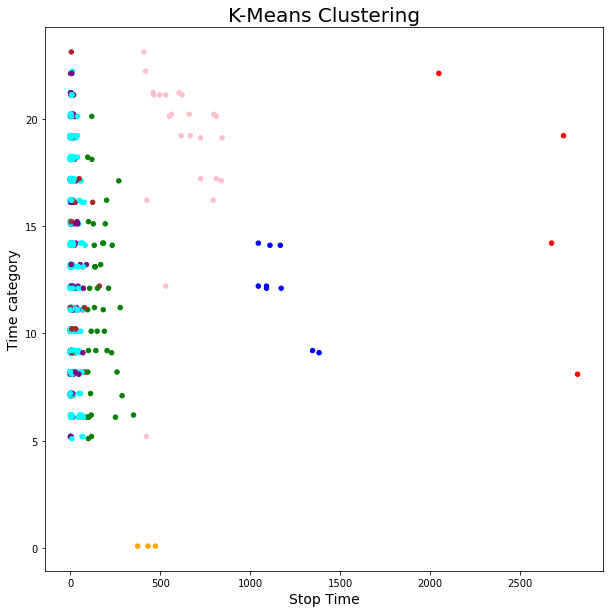

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

train_data['KMeans_labels']=model.labels_

colors=['purple','red','blue','green','orange','pink','cyan','brown']
plt.figure(figsize=(10,10))
plt.scatter(train_data['STime (h)'],train_data["Time_cat"],c=train_data['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=20)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Stop Time',fontsize=14)
plt.ylabel('Time category',fontsize=14)
plt.show()

In [ ]:
print('\nNumber of Clusters : ',model_n3.n_clusters)

predict_train_3 = model_n3.predict(train_data)
print('\nCLusters on train data',predict_train_3) 

predict_test_3 = model_n3.predict(test_data)
print('Clusters on test data',predict_test_3)


Number of Clusters :  8


ValueError: ignored

In [ ]:

train_data=req[:int(shape*0.8)].copy().drop(columns=["Time"])
test_data=req[int(shape*0.8)+1:].copy().drop(columns="Time")

from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=5)
dbscan_opt.fit(train_data)

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
train_data['DBSCAN_opt_labels']=dbscan_opt.labels_
train_data['DBSCAN_opt_labels'].value_counts()

-1    768
 1     38
 0     25
 2     11
 4      6
 3      6
Name: DBSCAN_opt_labels, dtype: int64

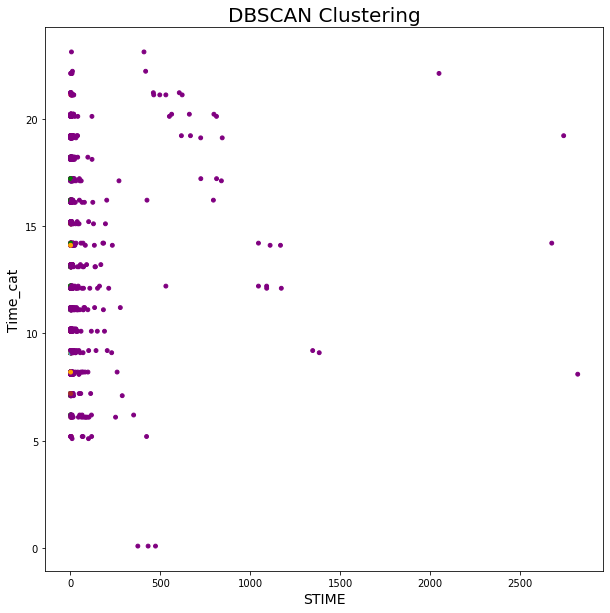

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train_data['STime (h)'],train_data["Time_cat"], c=train_data['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('STIME',fontsize=14)
plt.ylabel('Time_cat',fontsize=14)
plt.show()